In [2]:
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nwbfile_path = '/Volumes/T7/CatalystNeuro/Schneider/conversion_nwb/sub-m53_ses-231029.nwb'
io = NWBHDF5IO(nwbfile_path, 'r')
nwbfile = io.read()
display(nwbfile)

root pynwb.file.NWBFile at 0x4945540784
Fields:
  acquisition: {
    ElectricalSeries <class 'pynwb.ecephys.ElectricalSeries'>,
    video_camera_1 <class 'pynwb.image.ImageSeries'>,
    video_camera_2 <class 'pynwb.image.ImageSeries'>
  }
  devices: {
    MasmanidisSiliconMicroprobe128AxN <class 'pynwb.device.Device'>,
    intrinsic_signal_optical_imaging_laser <class 'pynwb.device.Device'>,
    lickometer <class 'pynwb.device.Device'>,
    rotary_encoder <class 'pynwb.device.Device'>,
    two_photon_microscope <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    ElectrodeGroup <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Identifying mistakes is important for improving performance during acoustic behaviors like speech and musicianship. Although hearing is instrumental for monitoring and adapting these behaviors, the neural circuits that integrate motor, acoustic, and goal-related signals to detect errors and guide ongoing sensorimotor adaptation in mammals remain unidentified. Here, we develop a novel closed-loop, sound-guided behavior that requires mice to use real-time acoustic feedback to guide skilled ongoing forelimb movements. Large scale electrophysiology recordings reveal that the mouse auditory cortex integrates information about sound and movement, as well as encodes error- and learning-related signals during this sound-generating behavior. Distinct groups of auditory cortex neurons signal different error types, and the activity of these neurons predicts both within-trial and across-trial behavioral adaptations. Brief, behavior-triggered optogenetic suppression of auditory cortex during error signaling hinders behavioral corrections on both rapid and long time scales, indicating that cortical error signals are necessary for skilled acoustic behaviors. Together, these experiments identify a cortical role for detecting errors and learning from mistakes and suggest that the auditory cortex plays a critical role in skilled, sound-generating behavior in mammals.
  experimenter: ['Zempolich, Grant W.' 'Schneider, David M.']
  file_create_date: [datetime.datetime(2024, 12, 18, 9, 6, 51, 25092, tzinfo=tzoffset(None, -28800))]
  identifier: 1fb4f618-1681-43b1-b541-cedcce1466cc
  institution: New York University
  intervals: {
    epochs <class 'pynwb.epoch.TimeIntervals'>,
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (3,), type "|O">
  lab: Schneider
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    intrinsic_signal_optical_imaging <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Mice performed the auditory guided task while electricophysiological neural activity was recorded in the primary auditory cortex (A1).
  session_id: 231029
  session_start_time: 2023-10-29 16:56:01-04:00
  source_script: Created using NeuroConv v0.6.5
  source_script_file_name: /opt/anaconda3/envs/schneider_lab_to_nwb_env/lib/python3.12/site-packages/neuroconv/basedatainterface.py
  subject: subject pynwb.file.Subject at 0x4946217632
Fields:
  age: P12W/
  age__reference: birth
  description: 12-week-old C57BL/6 or VGATChR2-EYFP mice were used for all behavioral, electrophysiology, and optogenetic experiments. In the VGAT-ChR2-EYFP mouse line, channelrhodopsin (ChR2) was coupled to the vesicular GABA transporter, inducing expression in GABAergic inhibitory neurons ubiquitously across cortex and allowing for real time optogenetic inhibition of brain regions of interest.
  genotype: C57BL/6 or VGATChR2-EYFP
  sex: U
  species: Mus musculus
  strain: C57BL/6
  subject_id: m53

  timestamps_reference_time: 2023-10-29 16:56:01-04:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

Retrieve Ephys and Behavioral Data

In [71]:
# Ephys
electrical_series = np.asarray(nwbfile.acquisition["ElectricalSeries"].data[:, 0])
fs = nwbfile.acquisition["ElectricalSeries"].rate
raw_to_uV = nwbfile.acquisition["ElectricalSeries"].conversion * 1e6
electrical_series_in_uV = electrical_series * raw_to_uV
electrical_series_timestamps = np.arange(0, len(electrical_series)) / fs

# Sorted Units
units = nwbfile.units.to_dataframe()
good_units = units[units.quality=="good"]

# Behavioral Events
tone_in = np.asarray(nwbfile.processing["behavior"].data_interfaces["toneIN"].timestamps)
tone_out = np.asarray(nwbfile.processing["behavior"].data_interfaces["toneOUT"].timestamps)
target_out = np.asarray(nwbfile.processing["behavior"].data_interfaces["targetOUT"].timestamps)
valve = np.asarray(nwbfile.processing["behavior"].data_interfaces["valve"].timestamps)

# Behavioral Time Series
encoder_data = np.asarray(nwbfile.processing["behavior"].data_interfaces["behavioral_time_series"]["encoder"].data)
encoder_timestamps = np.asarray(nwbfile.processing["behavior"].data_interfaces["behavioral_time_series"]["encoder"].timestamps)
lick_data = np.asarray(nwbfile.processing["behavior"].data_interfaces["behavioral_time_series"]["lick"].data)
lick_timestamps = np.asarray(nwbfile.processing["behavior"].data_interfaces["behavioral_time_series"]["lick"].timestamps)

# Behavioral Trials
trials = nwbfile.trials.to_dataframe()
example_rewarded_trial = trials[trials["rewarded"] == True].iloc[0]
example_unrewarded_trial = trials[trials["rewarded"] == False].iloc[0]

Plot an Example Rewarded Trial

/opt/anaconda3/envs/schneider_lab_to_nwb_env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/schneider_lab_to_nwb_env/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


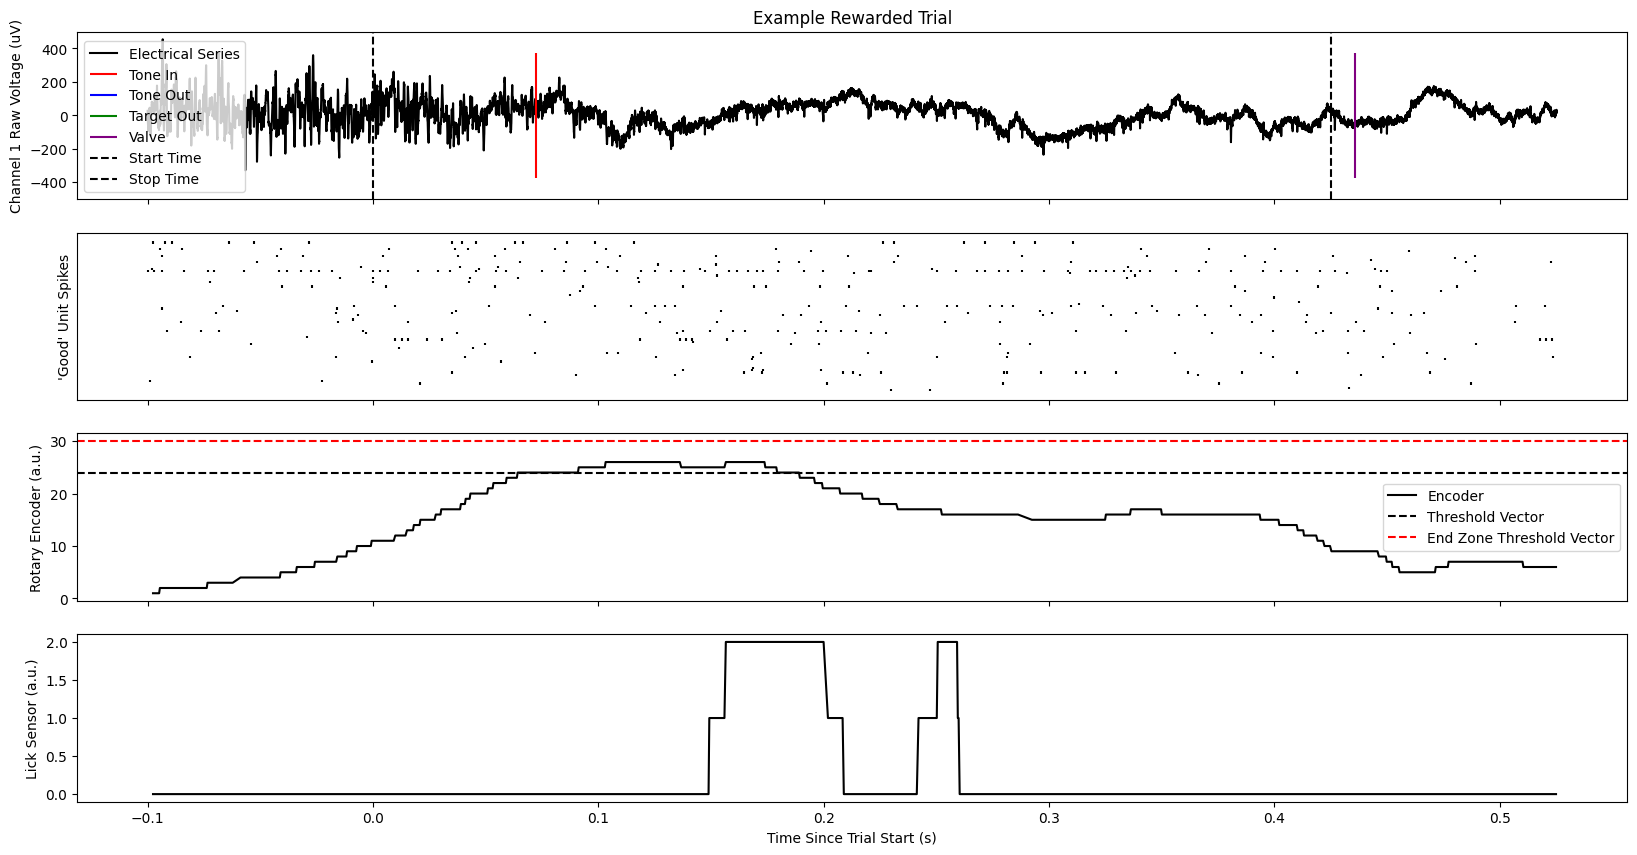

In [89]:
example_trial = example_rewarded_trial

# Define plot parameters
lineoffsets = 0
linelengths = 750
ylim = [-500, 500]
grace_time = 0.100

# Define time windows for plotting
plot_start_time = example_trial["start_time"] - grace_time
plot_end_time = example_trial["stop_time"] + grace_time
electrical_slice = slice(int(plot_start_time * fs), int(plot_end_time * fs))
tone_in_mask = (tone_in >= plot_start_time) & (tone_in <= plot_end_time)
tone_out_mask = (tone_out >= plot_start_time) & (tone_out <= plot_end_time)
target_out_mask = (target_out >= plot_start_time) & (target_out <= plot_end_time)
valve_mask = (valve >= plot_start_time) & (valve <= plot_end_time)
encoder_mask = (encoder_timestamps >= plot_start_time) & (encoder_timestamps <= plot_end_time)
lick_mask = (lick_timestamps >= plot_start_time) & (lick_timestamps <= plot_end_time)

# Normalize times to trial start time
trial_start_time = example_trial["start_time"]
normalized_tone_in = tone_in[tone_in_mask] - trial_start_time
normalized_tone_out = tone_out[tone_out_mask] - trial_start_time
normalized_target_out = target_out[target_out_mask] - trial_start_time
normalized_valve = valve[valve_mask] - trial_start_time
normalized_electrical_series_timestamps = electrical_series_timestamps[electrical_slice] - trial_start_time
normalized_encoder_timestamps = encoder_timestamps[encoder_mask] - trial_start_time
normalized_lick_timestamps = lick_timestamps[lick_mask] - trial_start_time

unit_masks, normalized_spike_times = [], []
for _, unit in good_units.iterrows():
    unit_mask = np.logical_and(unit.spike_times >= plot_start_time, unit.spike_times <= plot_end_time)
    spike_times = unit["spike_times"][unit_mask] - trial_start_time
    unit_masks.append(unit_mask)
    normalized_spike_times.append(spike_times)

fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
axs[0].set_title("Example Rewarded Trial")
axs[0].plot(normalized_electrical_series_timestamps, electrical_series_in_uV[electrical_slice], color="k", label="Electrical Series")
axs[0].eventplot(normalized_tone_in, color="red", label="Tone In", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_tone_out, color="blue", label="Tone Out", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_target_out, color="green", label="Target Out", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_valve, color="purple", label="Valve", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].axvline(0, color="black", linestyle="--", label="Start Time")
axs[0].axvline(example_trial["stop_time"] - example_trial["start_time"], color="black", linestyle="--", label="Stop Time")
axs[0].set_ylim(ylim)
axs[0].set_ylabel("Channel 1 Raw Voltage (uV)")
axs[0].legend()

axs[1].eventplot(normalized_spike_times, colors="k")
axs[1].set_yticks([])
axs[1].set_ylabel("'Good' Unit Spikes")

axs[2].plot(normalized_encoder_timestamps, encoder_data[encoder_mask], color="k", label="Encoder")
axs[2].axhline(example_trial["ThresholdVector"], color="black", linestyle="--", label="Threshold Vector")
axs[2].axhline(example_trial["endZone_ThresholdVector"], color="red", linestyle="--", label="End Zone Threshold Vector")
axs[2].set_ylabel("Rotary Encoder (a.u.)")
axs[2].legend()

axs[3].plot(normalized_lick_timestamps, lick_data[lick_mask], color="k", label="Lick")
axs[3].set_ylabel("Lick Sensor (a.u.)")
_ = axs[3].set_xlabel("Time Since Trial Start (s)")

Plot an Example Unrewarded Trial

In [ ]:
example_trial = example_unrewarded_trial

# Define plot parameters
lineoffsets = 0
linelengths = 400
ylim = [-250, 250]
grace_time = 0.100

# Define time windows for plotting
plot_start_time = example_trial["start_time"] - grace_time
plot_end_time = example_trial["stop_time"] + grace_time
electrical_slice = slice(int(plot_start_time * fs), int(plot_end_time * fs))
tone_in_mask = (tone_in >= plot_start_time) & (tone_in <= plot_end_time)
tone_out_mask = (tone_out >= plot_start_time) & (tone_out <= plot_end_time)
target_out_mask = (target_out >= plot_start_time) & (target_out <= plot_end_time)
valve_mask = (valve >= plot_start_time) & (valve <= plot_end_time)
encoder_mask = (encoder_timestamps >= plot_start_time) & (encoder_timestamps <= plot_end_time)
lick_mask = (lick_timestamps >= plot_start_time) & (lick_timestamps <= plot_end_time)

# Normalize times to trial start time
trial_start_time = example_trial["start_time"]
normalized_tone_in = tone_in[tone_in_mask] - trial_start_time
normalized_tone_out = tone_out[tone_out_mask] - trial_start_time
normalized_target_out = target_out[target_out_mask] - trial_start_time
normalized_valve = valve[valve_mask] - trial_start_time
normalized_electrical_series_timestamps = electrical_series_timestamps[electrical_slice] - trial_start_time
normalized_encoder_timestamps = encoder_timestamps[encoder_mask] - trial_start_time
normalized_lick_timestamps = lick_timestamps[lick_mask] - trial_start_time

unit_masks, normalized_spike_times = [], []
for _, unit in good_units.iterrows():
    unit_mask = np.logical_and(unit.spike_times >= plot_start_time, unit.spike_times <= plot_end_time)
    spike_times = unit["spike_times"][unit_mask] - trial_start_time
    unit_masks.append(unit_mask)
    normalized_spike_times.append(spike_times)

fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
axs[0].set_title("Example Unrewarded Trial")
axs[0].plot(normalized_electrical_series_timestamps, electrical_series_in_uV[electrical_slice], color="k", label="Electrical Series")
axs[0].eventplot(normalized_tone_in, color="red", label="Tone In", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_tone_out, color="blue", label="Tone Out", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_target_out, color="green", label="Target Out", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].eventplot(normalized_valve, color="purple", label="Valve", lineoffsets=lineoffsets, linelengths=linelengths)
axs[0].axvline(0, color="black", linestyle="--", label="Start Time")
axs[0].axvline(example_trial["stop_time"] - example_trial["start_time"], color="black", linestyle="--", label="Stop Time")
axs[0].set_ylim(ylim)
axs[0].set_ylabel("Channel 1 Raw Voltage (uV)")
axs[0].legend()

axs[1].eventplot(normalized_spike_times, colors="k")
axs[1].set_yticks([])
axs[1].set_ylabel("'Good' Unit Spikes")

axs[2].plot(normalized_encoder_timestamps, encoder_data[encoder_mask], color="k", label="Encoder")
axs[2].axhline(example_trial["ThresholdVector"], color="black", linestyle="--", label="Threshold Vector")
axs[2].axhline(example_trial["endZone_ThresholdVector"], color="red", linestyle="--", label="End Zone Threshold Vector")
axs[2].set_ylabel("Rotary Encoder (a.u.)")
axs[2].legend()

axs[3].plot(normalized_lick_timestamps, lick_data[lick_mask], color="k", label="Lick")
axs[3].set_ylabel("Lick Sensor (a.u.)")
_ = axs[3].set_xlabel("Time Since Trial Start (s)")